## FBProphet

In [1]:
! pip install fbprophet

You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### 讀取資料

Populating the interactive namespace from numpy and matplotlib


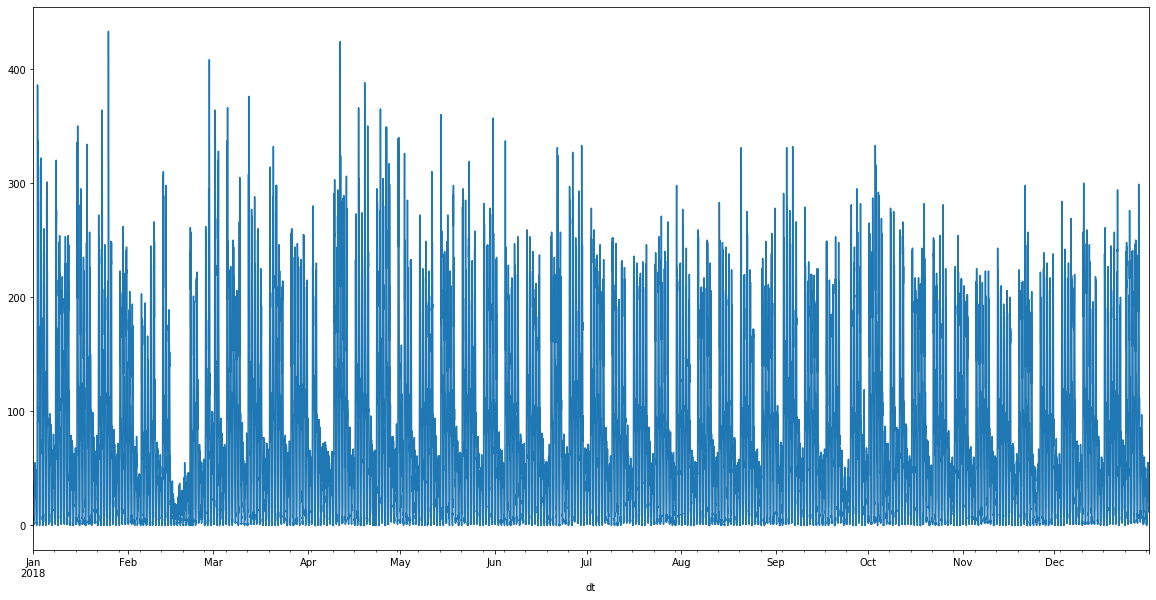

In [2]:
%pylab inline
import pandas
df = pandas.read_csv('data_edited_2018.csv')
df['dt'] = df['date'] + ' ' + df['time']
df['dt'] = pandas.to_datetime(df['dt'], format = '%Y/%m/%d %H:%M')
df.set_index('dt', inplace=True)
df['y'].plot(kind = 'line', figsize = [20,10])

In [3]:
len(df)

17520

In [4]:
len(df) * 0.75

13140.0

### 資料預處理

In [7]:
train_data = df.iloc[:13140]
test_data = df.iloc[13140:]
train_df = train_data['y'].to_frame()
train_df.reset_index(inplace=True)
train_df.columns = ['ds', 'y']
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13140 entries, 0 to 13139
Data columns (total 2 columns):
ds    13140 non-null datetime64[ns]
y     13140 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 205.4 KB


In [8]:
train_df.head()

,ds,y
0,2018-01-01 00:00:00,10
1,2018-01-01 00:30:00,6
2,2018-01-01 01:00:00,4
3,2018-01-01 01:30:00,5
4,2018-01-01 02:00:00,1


### 產生預測結果 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


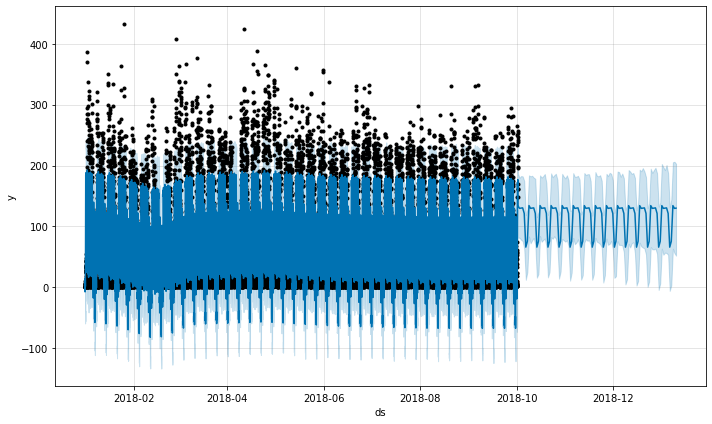

In [11]:
from fbprophet import Prophet
model = Prophet()
model.fit(train_df)

future = model.make_future_dataframe(periods=100)
forecast = model.predict(future)
figure=model.plot(forecast)

#  Seq2Seq (LSTM)

### 讀取資料

In [1]:
%matplotlib inline
import pandas
df = pandas.read_csv('/Users/davidchiu/course/cathayts/data_edited_2018.csv')
df.head(3)

,date,time,y,dayofweek,sms,month,workday,lag_48_1,lag_48_2,lag_48_3,lag_48_4,lag_48_5,lag_48_6,lag_48_7
0,2018/1/1,00:00,10,1,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018/1/1,00:30,6,1,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018/1/1,01:00,4,1,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


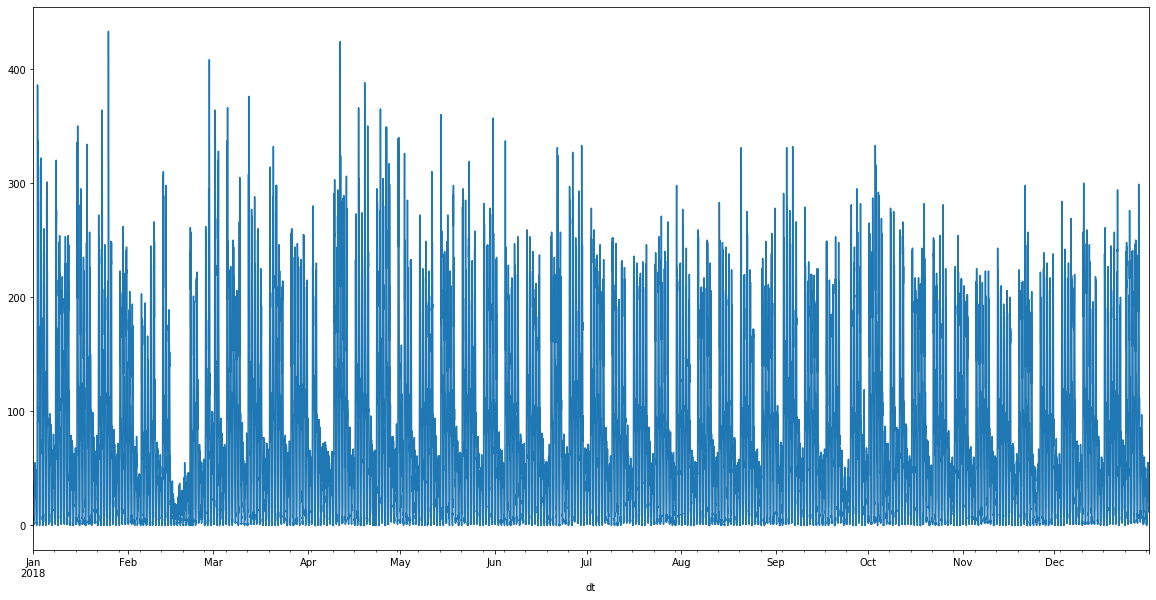

In [2]:
df['dt'] = df['date'] + ' ' + df['time']
df['dt'] = pandas.to_datetime(df['dt'], format = '%Y/%m/%d %H:%M')
df.set_index('dt', inplace=True)
df['y'].plot(kind = 'line', figsize = [20,10])

### 資料預處理

In [3]:
df['sms'] = df['sms'].fillna(0)

In [4]:
df['hour'] = df.index.hour 
df['dayofweek'] = df.index.dayofweek
df['season'] = (df.index.month%12 + 3)//3

In [5]:
df = df[['y', 'sms','hour','dayofweek','month', 'season', 'workday']]

In [6]:
df.head(3)

,y,sms,hour,dayofweek,month,season,workday
dt,,,,,,,
2018-01-01 00:00:00,10,0.0,0,0,1,1,0
2018-01-01 00:30:00,6,0.0,0,0,1,1,0
2018-01-01 01:00:00,4,0.0,1,0,1,1,0


### 轉換虛擬變數

In [7]:
columns_to_cat = ['sms','hour', 'dayofweek', 'month','season']
df[columns_to_cat] = df[columns_to_cat].astype('category')

data = pandas.get_dummies(df, columns=columns_to_cat) 
data.head(3)

,y,workday,sms_0.0,sms_1.0,sms_2.0,sms_3.0,sms_4.0,hour_0,hour_1,hour_2,...,month_7,month_8,month_9,month_10,month_11,month_12,season_1,season_2,season_3,season_4
dt,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,10,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2018-01-01 00:30:00,6,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2018-01-01 01:00:00,4,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
len(data.columns)

54

In [8]:
data.columns

Index(['y', 'workday', 'sms_0.0', 'sms_1.0', 'sms_2.0', 'sms_3.0', 'sms_4.0',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'dayofweek_0',
       'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
       'dayofweek_5', 'dayofweek_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'season_1', 'season_2', 'season_3',
       'season_4'],
      dtype='object')

In [10]:
# 增加一個原欄位y 的copy, 以利df_to_lstm_format 前期的y 變為變數
data['y_copy'] = data['y']
data.head(3)

,y,workday,sms_0.0,sms_1.0,sms_2.0,sms_3.0,sms_4.0,hour_0,hour_1,hour_2,...,month_8,month_9,month_10,month_11,month_12,season_1,season_2,season_3,season_4,y_copy
dt,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,10,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,10
2018-01-01 00:30:00,6,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,6
2018-01-01 01:00:00,4,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,4


### 將 DataFrame 轉變為 LSTM 格式

In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def df_to_lstm_format(df, test_size=0.5, look_back=5, target_column='target', scale_X=True):

    df = df.copy()

    # 最後一個欄位為預測目標
    df['target'] = df[target_column] 
    # 捨棄 y
    df = df.drop(columns=[target_column]) 
    
    # 取得目標 y
    target_location = df.shape[1] - 1 
    
    # 根據 test_size 比例分割資料
    split_index = int(df.shape[0]*test_size) 
    
    # 訓練資料集
    X_train = df.values[:split_index, :target_location]
    y_train = df.values[:split_index, target_location]

    # 測試資料集
    X_test = df.values[split_index:, :target_location] 
    y_test = df.values[split_index:, target_location] 

    # 將資料正規化 (如果 scale_X 為True)
    if scale_X:
        scalerX = StandardScaler(with_mean=True, with_std=True).fit(X_train)
        X_train = scalerX.transform(X_train)
        X_test = scalerX.transform(X_test)
        
    # 重塑輸入矩陣
    samples = len(X_train) 
    num_features = target_location 

    samples_train = X_train.shape[0] - look_back
    
    # 重塑訓練資料
    # (資料筆數, 往前看多少筆, 特徵數量)
    X_train_reshaped = np.zeros((samples_train, look_back, num_features))
    y_train_reshaped = np.zeros((samples_train))

    
    for i in range(samples_train):
        y_position = i + look_back
        X_train_reshaped[i] = X_train[i:y_position]
        y_train_reshaped[i] = y_train[y_position]

    # 重塑測試資料
    samples_test = X_test.shape[0] - look_back
    X_test_reshaped = np.zeros((samples_test, look_back, num_features))
    y_test_reshaped = np.zeros((samples_test))

    for i in range(samples_test):
        y_position = i + look_back
        X_test_reshaped[i] = X_test[i:y_position]
        y_test_reshaped[i] = y_test[y_position]
    
    return X_train_reshaped, y_train_reshaped, X_test_reshaped, y_test_reshaped

In [19]:
X_train_reshaped, y_train_reshaped, X_test_reshaped, y_test_reshaped = df_to_lstm_format(data, test_size=0.8, look_back=5, target_column='y', scale_X=False)

In [20]:
data.head(3)

,y,workday,sms_0.0,sms_1.0,sms_2.0,sms_3.0,sms_4.0,hour_0,hour_1,hour_2,...,month_8,month_9,month_10,month_11,month_12,season_1,season_2,season_3,season_4,y_copy
dt,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,10,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,10
2018-01-01 00:30:00,6,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,6
2018-01-01 01:00:00,4,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,4


In [21]:
X_train_reshaped.shape

(14011, 5, 54)

In [17]:
X_train_reshaped[1]

array([[0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 6.]])

In [18]:
y_train_reshaped[1]

4.0

In [22]:
X_train_reshaped, y_train_reshaped, X_test_reshaped, y_test_reshaped = df_to_lstm_format(data, test_size=0.8, look_back=5, target_column='y', scale_X=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
#X_train_reshaped[1]

### 計算 mape 與 smape

In [25]:
import keras.backend as K
def mape(y_true, y_pred):
    return (K.abs(y_true - y_pred) / K.abs(y_pred)) * 100

def smape(y_true, y_pred):
    return (K.abs(y_pred - y_true) / ((K.abs(y_true) + K.abs(y_pred))))*100

Using TensorFlow backend.
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/d

### 訓練與測試資料集

In [31]:
look_back = 7*48
test_size = 0.8


X_train, y_train, X_test, y_test = df_to_lstm_format(df=data, 
                                                     test_size=test_size, 
                                                     look_back=look_back, 
                                                     target_column='y', scale_X=True)

# 建立編碼器與解碼器所需numpy array
encoder_input_train = X_train
decoder_input_train = np.zeros((X_train.shape[0], X_train.shape[1], 1)) # Zeros array
decoder_output_train = y_train.reshape((y_train.shape[0], 1, 1))

encoder_input_test = X_test
decoder_input_test = np.zeros((X_test.shape[0], X_test.shape[1], 1)) # Zeros array
decoder_output_test = y_test.reshape((y_test.shape[0], 1, 1))

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13680, 336, 54), (13680,), (3168, 336, 54), (3168,))

### Seq2Seq (LSTM版本)

In [33]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense

### 編碼器 (Encoder)

In [34]:
num_features = data.shape[1] - 1

encoder_inputs = Input(shape=(None, num_features))
encoder = LSTM(50, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

### 解碼器 (Decoder)

In [36]:
decoder_inputs = Input(shape=(None, 1))
decoder_lstm = LSTM(50, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(1, activation='linear')
decoder_outputs = decoder_dense(decoder_outputs)

### 建立且編譯模型

In [37]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='mse', metrics=[mape, smape])

### 訓練模型

In [53]:
model.fit([encoder_input_train, decoder_input_train], decoder_output_train, 
          validation_data=([encoder_input_test, decoder_input_test], decoder_output_test), 
          epochs=3, verbose=1)

print(model.summary())

Train on 13680 samples, validate on 3168 samples
Epoch 1/3
13680/13680 [==============================] - 95s 7ms/step - loss: 5831.5028 - mape: 73241528.0000 - smape: 55.5013 - val_loss: 4015.4777 - val_mape: 17161622.0000 - val_smape: 55.2289
Epoch 2/3
13680/13680 [==============================] - 100s 7ms/step - loss: 4847.7391 - mape: 86272136.0000 - smape: 53.8674 - val_loss: 3447.9539 - val_mape: 37127744.0000 - val_smape: 52.1078
Epoch 3/3
13680/13680 [==============================] - 126s 9ms/step - loss: 4150.0507 - mape: 66132536.0000 - smape: 51.4575 - val_loss: 2551.1768 - val_mape: 30709156.0000 - val_smape: 46.2132
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, 54)     0                                            
_______________________________________________

### 產生預測結果

In [54]:
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(50,))
decoder_state_input_c = Input(shape=(50,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)

decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [55]:
def predict(x, encoder_predict_model, decoder_predict_model, num_steps_to_predict):
    y_predicted = []

    # 將輸入值轉變為狀態向量
    states = encoder_predict_model.predict(x)

    # 狀態向量必須是 list
    if not isinstance(states, list):
        states = [states]

    # 產生第一筆解碼值
    decoder_input = np.zeros((x.shape[0], 1, 1))


    for _ in range(num_steps_to_predict):
        outputs_and_states = decoder_predict_model.predict(
        [decoder_input] + states, batch_size=batch_size)
        output = outputs_and_states[0]
        states = outputs_and_states[1:]

        # 增加預測結果
        y_predicted.append(output)

    return np.concatenate(y_predicted, axis=1)

In [56]:
# 每次只預測下一筆
num_steps_to_predict = 1
batch_size = 1

y_preds= predict(X_test, encoder_model, decoder_model, num_steps_to_predict)
y_preds = y_preds.reshape(y_preds.shape[0])
y_preds.shape

(3168,)

In [57]:
y_true = y_test.reshape(y_test.shape[0])
y_true.shape

(3168,)

In [58]:

split_index = int(data.shape[0]*test_size)
x = data[split_index:]

In [59]:
datetime_difference = len(x) - len(y_true)
x = x[datetime_difference:] # 修正延遲數
x.index.shape

(3168,)

### 評估預測結果

3168/3168 [==============================] - 6s 2ms/step


Text(0.5, 1.0, 'Seq2Seq \n MSE = 2551.18 \n MAPE = 30709156.0 [%] \n SMAPE = 46.2 [%]')

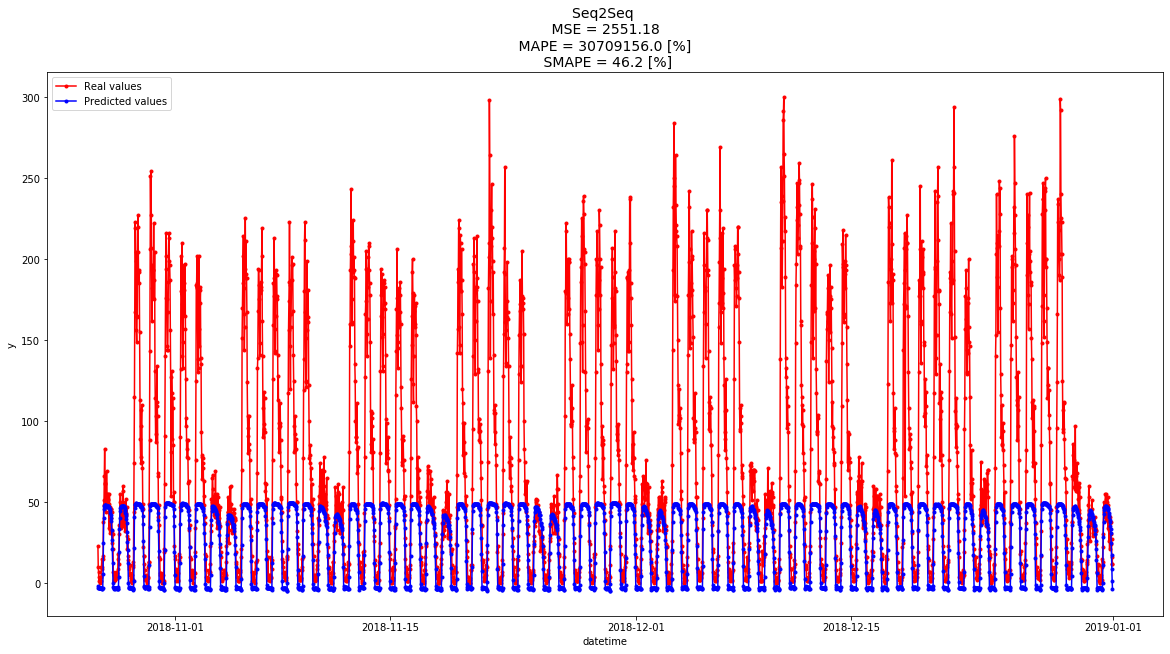

In [60]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(x.index, y_true, '.-', color='red', label='Real values')
plt.plot(x.index, y_preds, '.-', color='blue', label='Predicted values')

plt.ylabel('y')
plt.xlabel('datetime')
plt.legend()

mse = model.evaluate([encoder_input_test, decoder_input_test], decoder_output_test)[0]
mape = model.evaluate([encoder_input_test, decoder_input_test], decoder_output_test)[1]
smape = model.evaluate([encoder_input_test, decoder_input_test], decoder_output_test)[2]

plt.title('Seq2Seq \n MSE = %.2f \n MAPE = %.1f [%%] \n SMAPE = %.1f [%%]' % (mse, mape, smape), fontsize = 14)

### 以天為單位比對預測結果

In [61]:
split_index = int(data.shape[0]*test_size)
x = data[split_index:]

# 修正預測跟實際值差距的數值
datetime_difference = len(x) - len(y_true)
x = x[datetime_difference:] 

# 比對預測與實際值
datetime = x.index
y_preds = y_preds.reshape(y_preds.shape[0])
y_true = y_true.reshape(y_true.shape[0])
results = pandas.DataFrame(y_true, y_preds) 
result = results.reset_index() 
result.columns = ['y_pred', 'y_true']
result['datetime'] = datetime
result = result.set_index(['datetime'])

# 重新取樣
result = result.resample('D').sum()
# 去除Nan
result = result.dropna()

In [62]:

ytrue = result['y_true']
ypred = result['y_pred']
n = len(result)

mse = (1/n)*np.sum((ypred - ytrue)**2)
mape = (100/n) * np.sum(np.abs((ytrue - ypred) / ypred))
smape = (100/n) * np.sum( np.abs((ytrue - ypred)) / (np.abs(ytrue) + np.abs(ypred)) )

Text(0.5, 1.0, 'Seq2Seq By Day \n MSE = 6496222.72 \n MAPE = 173.3 [%] \n SMAPE = 42.3 [%]')

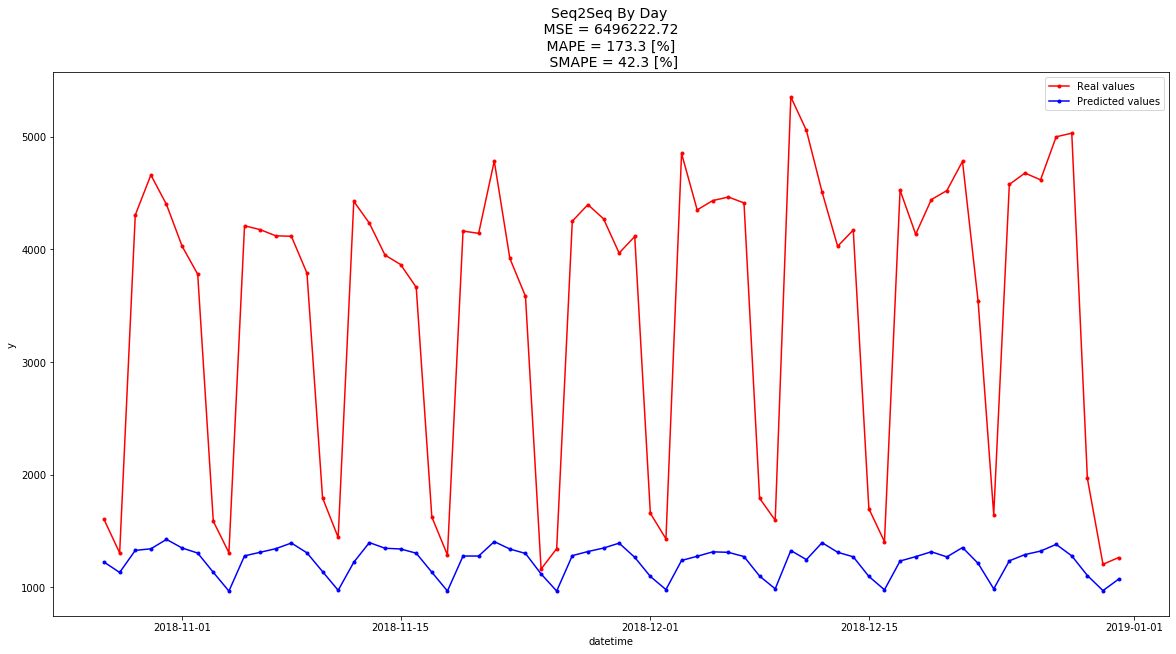

In [63]:
plt.figure(figsize=(20,10))
plt.plot(result.index, result['y_true'], '.-', color='red', label='Real values') 
plt.plot(result.index, result['y_pred'], '.-', color='blue', label='Predicted values')

plt.ylabel('y')
plt.xlabel('datetime')
plt.legend()

plt.title('Seq2Seq By Day \n MSE = %.2f \n MAPE = %.1f [%%] \n SMAPE = %.1f [%%]' % (mse, mape, smape), fontsize = 14)

### 儲存模型

In [50]:
model.save('seq2seq_lstm_30_iters_3.h5')

In [51]:
import keras
from keras.utils.generic_utils import get_custom_objects
import keras.backend as K
def mape(y_true, y_pred):
    return (K.abs(y_true - y_pred) / K.abs(y_pred)) * 100

def smape(y_true, y_pred):
    return (K.abs(y_pred - y_true) / ((K.abs(y_true) + K.abs(y_pred))))*100


get_custom_objects().update({"smape": smape})


model = keras.models.load_model('seq2seq_lstm_30_iters_3.h5')

3168/3168 [==============================] - 5s 2ms/step


Text(0.5, 1.0, 'Seq2Seq \n MSE = 5092.44 \n MAPE = 71568880.0 [%] \n SMAPE = 56.3 [%]')

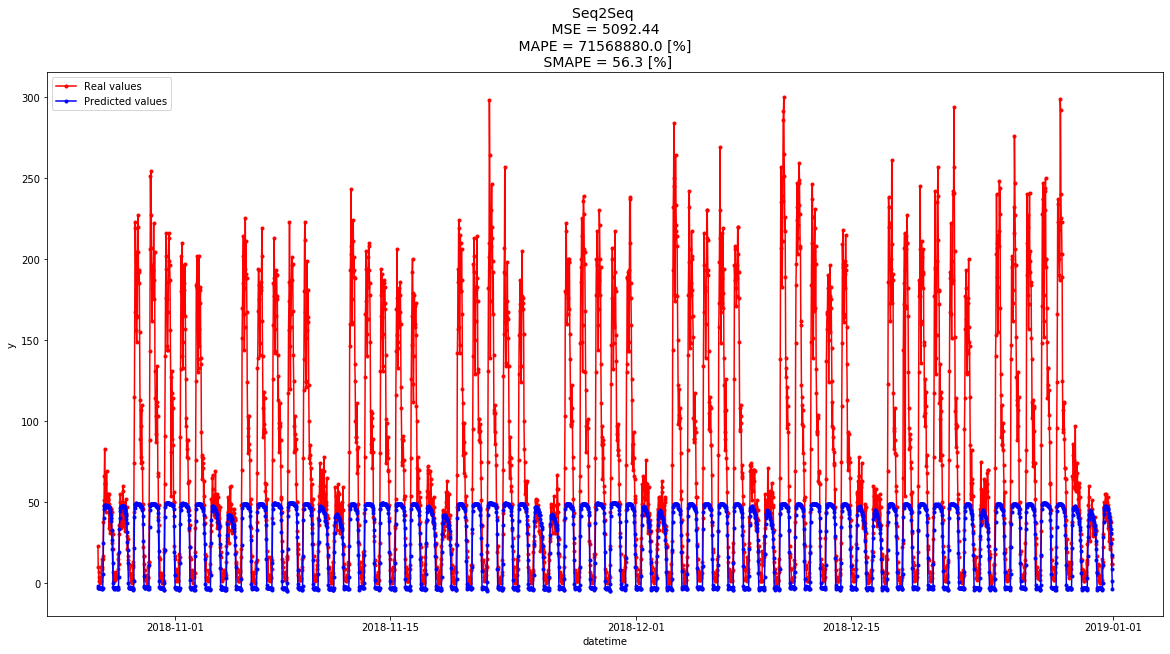

In [52]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(x.index, y_true, '.-', color='red', label='Real values')
plt.plot(x.index, y_preds, '.-', color='blue', label='Predicted values')

plt.ylabel('y')
plt.xlabel('datetime')
plt.legend()

mse = model.evaluate([encoder_input_test, decoder_input_test], decoder_output_test)[0]
mape = model.evaluate([encoder_input_test, decoder_input_test], decoder_output_test)[1]
smape = model.evaluate([encoder_input_test, decoder_input_test], decoder_output_test)[2]

plt.title('Seq2Seq \n MSE = %.2f \n MAPE = %.1f [%%] \n SMAPE = %.1f [%%]' % (mse, mape, smape), fontsize = 14)

## Multivariate Regression 

### 讀取資料

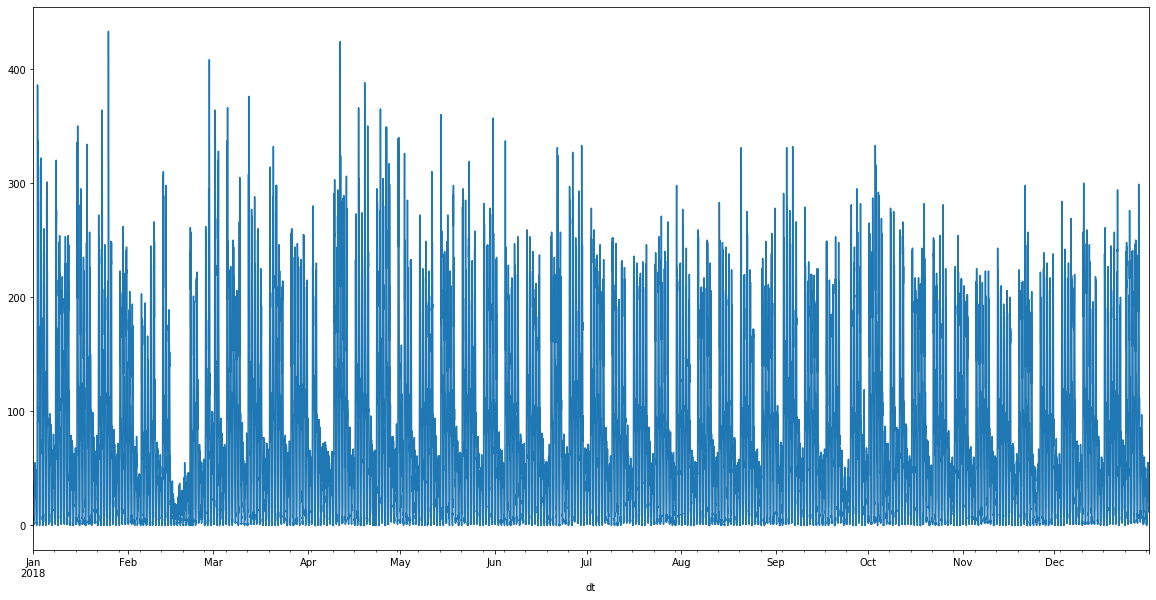

In [65]:
%matplotlib inline
import pandas
df = pandas.read_csv('/Users/davidchiu/course/cathayts/data_edited_2018.csv')
df['dt'] = df['date'] + ' ' + df['time']
df['dt'] = pandas.to_datetime(df['dt'], format = '%Y/%m/%d %H:%M')
df.set_index('dt', inplace=True)
df['y'].plot(kind = 'line', figsize = [20,10])

### 資料預處理

In [66]:
df['sms'] = df['sms'].fillna(0)

In [67]:
df['hour'] = df.index.hour 
df['dayofweek'] = df.index.dayofweek
df['season'] = (df.index.month%12 + 3)//3

In [68]:
df = df[['y', 'sms','hour','dayofweek','month', 'season', 'workday']]

In [69]:

df.head(3)

,y,sms,hour,dayofweek,month,season,workday
dt,,,,,,,
2018-01-01 00:00:00,10,0.0,0,0,1,1,0
2018-01-01 00:30:00,6,0.0,0,0,1,1,0
2018-01-01 01:00:00,4,0.0,1,0,1,1,0


### 轉換虛擬變數

In [70]:
columns_to_cat = ['sms','hour', 'dayofweek', 'month','season']
df[columns_to_cat] = df[columns_to_cat].astype('category')

data = pandas.get_dummies(df, columns=columns_to_cat) 
data.head(3)

,y,workday,sms_0.0,sms_1.0,sms_2.0,sms_3.0,sms_4.0,hour_0,hour_1,hour_2,...,month_7,month_8,month_9,month_10,month_11,month_12,season_1,season_2,season_3,season_4
dt,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,10,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2018-01-01 00:30:00,6,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2018-01-01 01:00:00,4,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

### 訓練與測試資料集

In [72]:

split_index = int(len(X)*0.8)

X_train_values = X[:split_index] 
X_test_values = X[split_index:]

In [73]:

y_train = y[:split_index] 
y_test = y[split_index:]

### 資料標準化

In [74]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler(with_mean=True, with_std=True).fit(X_train_values)

X_train = scalerX.transform(X_train_values)
X_test = scalerX.transform(X_test_values)

### 建立迴歸模型

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
#model = LinearRegression()
model =GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9192762950909019

In [79]:

y_pred = model.predict(X_test)
y_true = y_test.values.reshape(y_test.shape[0], 1)

split_index = int(data.shape[0]*0.8)
x = data[split_index:]

datetime_difference = len(x) - len(y_true)

###  評估預測結果

Text(0.5, 1.0, 'MVLR result \n MSE = 16198895.37 \n MAPE = 1093174.5 [%] \n SMAPE = 94514.8 [%]')

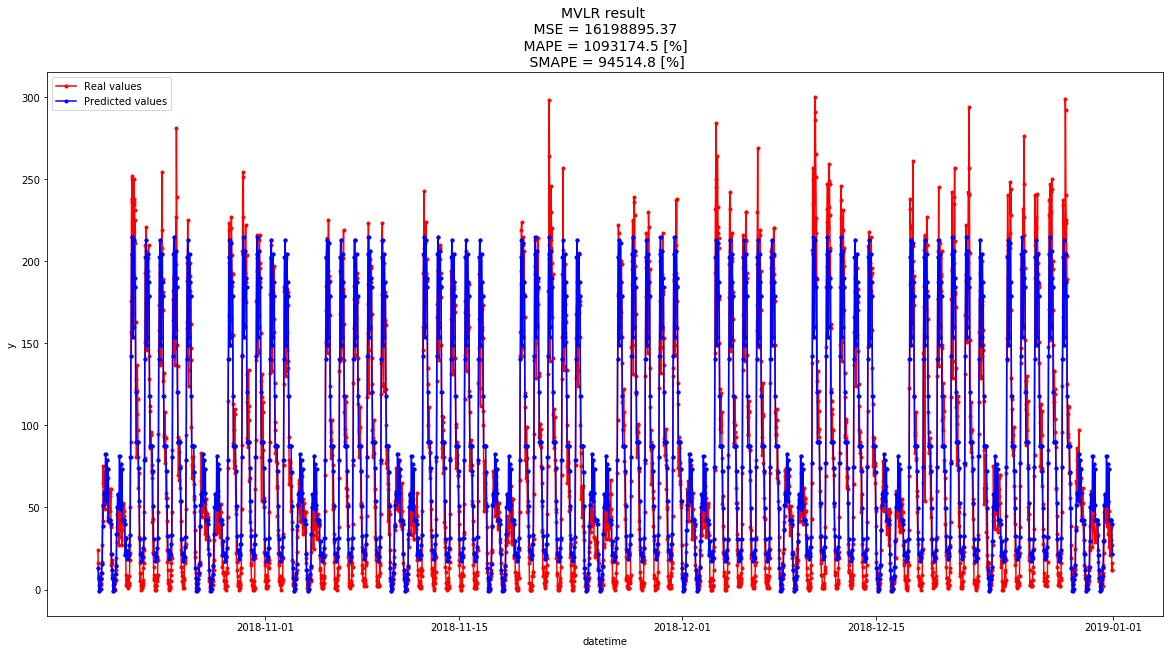

In [80]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(x.index, y_true, '.-', color='red', label='Real values')
plt.plot(x.index, y_pred, '.-', color='blue', label='Predicted values')

plt.ylabel('y')
plt.xlabel('datetime') 

plt.legend()

n = len(y_pred) + len(y_true)

# 計算 mse, mape, smape
mse_result = (1/n)*np.sum((y_pred - y_true)**2)
mape_result = (100/n) * np.sum(np.abs((y_true - y_pred) / y_pred))
smape_result = (100/n) * np.sum( np.abs((y_true - y_pred)) / (np.abs(y_true) + np.abs(y_pred)) )

plt.title('MVLR result \n MSE = %.2f \n MAPE = %.1f [%%] \n SMAPE = %.1f [%%]' % (mse_result, mape_result, smape_result), fontsize = 14)

In [81]:
test_size = 0.8
split_index = int(data.shape[0]*test_size)
x = data[split_index:]

# 修正預測跟實際值差距的數值
datetime_difference = len(x) - len(y_true)
x = x[datetime_difference:] 

# 比對預測與實際值
datetime = x.index

results = pandas.DataFrame(y_true, y_pred) 
result = results.reset_index() 
result.columns = ['y_pred', 'y_true']
result['datetime'] = datetime
result = result.set_index(['datetime'])

# 重新取樣
result = result.resample('D').sum()
# 去除Nan
result = result.dropna()

In [82]:
# 比較預測與實際值

ytrue = result['y_true']
ypred = result['y_pred']
n = len(result)

mse = (1/n)*np.sum((ypred - ytrue)**2)
mape = (100/n) * np.sum(np.abs((ytrue - ypred) / ypred))
smape = (100/n) * np.sum( np.abs((ytrue - ypred)) / (np.abs(ytrue) + np.abs(ypred)) )

Text(0.5, 1.0, 'Seq2Seq By Day \n MSE = 185212.54 \n MAPE = 10.6 [%] \n SMAPE = 5.7 [%]')

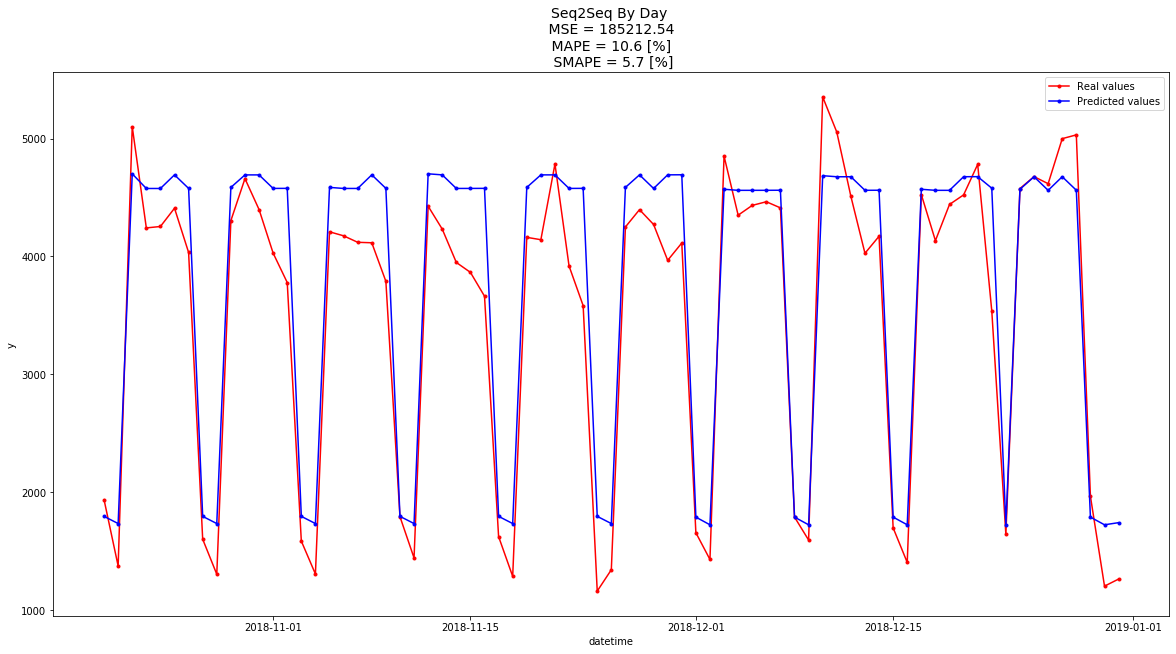

In [83]:
plt.figure(figsize=(20,10))
plt.plot(result.index, result['y_true'], '.-', color='red', label='Real values') 
plt.plot(result.index, result['y_pred'], '.-', color='blue', label='Predicted values')

plt.ylabel('y')
plt.xlabel('datetime')
plt.legend()

plt.title('Seq2Seq By Day \n MSE = %.2f \n MAPE = %.1f [%%] \n SMAPE = %.1f [%%]' % (mse, mape, smape), fontsize = 14)

## Seq2Seq (GRU)

### 讀取資料

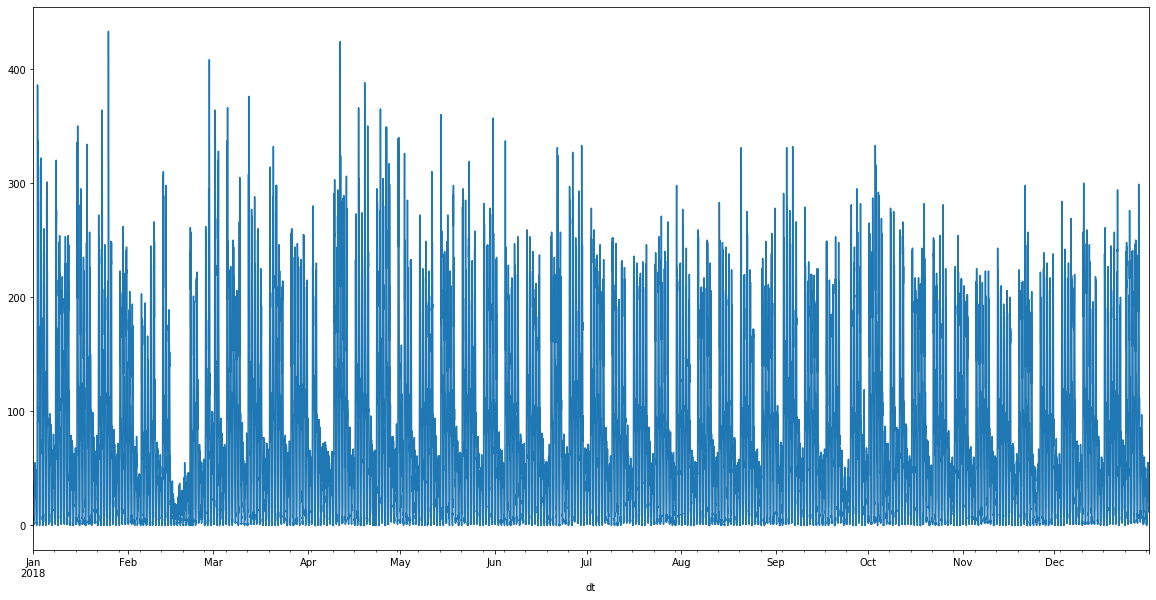

In [84]:
%matplotlib inline
import pandas
df = pandas.read_csv('/Users/davidchiu/course/cathayts/data_edited_2018.csv')
df['dt'] = df['date'] + ' ' + df['time']
df['dt'] = pandas.to_datetime(df['dt'], format = '%Y/%m/%d %H:%M')
df.set_index('dt', inplace=True)
df['y'].plot(kind = 'line', figsize = [20,10])

### 資料預處理

In [85]:
df['sms'] = df['sms'].fillna(0)

In [86]:
df['hour'] = df.index.hour 
df['dayofweek'] = df.index.dayofweek
df['season'] = (df.index.month%12 + 3)//3

In [87]:
df = df[['y', 'sms','hour','dayofweek','month', 'season', 'workday']]

In [88]:
df.head(3)

,y,sms,hour,dayofweek,month,season,workday
dt,,,,,,,
2018-01-01 00:00:00,10,0.0,0,0,1,1,0
2018-01-01 00:30:00,6,0.0,0,0,1,1,0
2018-01-01 01:00:00,4,0.0,1,0,1,1,0


### 轉換虛擬變數

In [89]:
columns_to_cat = ['sms','hour', 'dayofweek', 'month','season']
df[columns_to_cat] = df[columns_to_cat].astype('category')

data = pandas.get_dummies(df, columns=columns_to_cat) 
data.head(3)

,y,workday,sms_0.0,sms_1.0,sms_2.0,sms_3.0,sms_4.0,hour_0,hour_1,hour_2,...,month_7,month_8,month_9,month_10,month_11,month_12,season_1,season_2,season_3,season_4
dt,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,10,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2018-01-01 00:30:00,6,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2018-01-01 01:00:00,4,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [90]:
# 增加一個原欄位y 的copy, 以利df_to_lstm_format 前期的y 變為變數
data['y_copy'] = data['y']
data.head(3)

,y,workday,sms_0.0,sms_1.0,sms_2.0,sms_3.0,sms_4.0,hour_0,hour_1,hour_2,...,month_8,month_9,month_10,month_11,month_12,season_1,season_2,season_3,season_4,y_copy
dt,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,10,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,10
2018-01-01 00:30:00,6,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,6
2018-01-01 01:00:00,4,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,4


### 將 DataFrame 轉變為 LSTM 格式

In [91]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def df_to_lstm_format(df, test_size=0.5, look_back=5, target_column='target', scale_X=True):

    df = df.copy()

    # 最後一個欄位為預測目標
    df['target'] = df[target_column] 
    # 捨棄 y
    df = df.drop(columns=[target_column]) 
    
    # 取得目標 y
    target_location = df.shape[1] - 1 
    
    # 根據 test_size 比例分割資料
    split_index = int(df.shape[0]*test_size) 
    
    # 訓練資料集
    X_train = df.values[:split_index, :target_location]
    y_train = df.values[:split_index, target_location]

    # 測試資料集
    X_test = df.values[split_index:, :target_location] 
    y_test = df.values[split_index:, target_location] 

    # 將資料正規化 (如果 scale_X 為True)
    if scale_X:
        scalerX = StandardScaler(with_mean=True, with_std=True).fit(X_train)
        X_train = scalerX.transform(X_train)
        X_test = scalerX.transform(X_test)
        
    # 重塑輸入矩陣
    samples = len(X_train) 
    num_features = target_location 

    samples_train = X_train.shape[0] - look_back
    
    # 重塑訓練資料
    # (資料筆數, 往前看多少筆, 特徵數量)
    X_train_reshaped = np.zeros((samples_train, look_back, num_features))
    y_train_reshaped = np.zeros((samples_train))

    
    for i in range(samples_train):
        y_position = i + look_back
        X_train_reshaped[i] = X_train[i:y_position]
        y_train_reshaped[i] = y_train[y_position]

    # 重塑測試資料
    samples_test = X_test.shape[0] - look_back
    X_test_reshaped = np.zeros((samples_test, look_back, num_features))
    y_test_reshaped = np.zeros((samples_test))

    for i in range(samples_test):
        y_position = i + look_back
        X_test_reshaped[i] = X_test[i:y_position]
        y_test_reshaped[i] = y_test[y_position]
    
    return X_train_reshaped, y_train_reshaped, X_test_reshaped, y_test_reshaped

### 計算 mape 與 smape

In [92]:
import keras.backend as K
def mape(y_true, y_pred):
    return (K.abs(y_true - y_pred) / K.abs(y_pred)) * 100

def smape(y_true, y_pred):
    return (K.abs(y_pred - y_true) / ((K.abs(y_true) + K.abs(y_pred))))*100

In [93]:
look_back = 7*48
test_size = 0.8


X_train, y_train, X_test, y_test = df_to_lstm_format(df=data, 
                                                     test_size=test_size, 
                                                     look_back=look_back, 
                                                     target_column='y', scale_X=True)

# 建立編碼器與解碼器所需numpy array
encoder_input_train = X_train
decoder_input_train = np.zeros((X_train.shape[0], X_train.shape[1], 1)) # Zeros array
decoder_output_train = y_train.reshape((y_train.shape[0], 1, 1))

encoder_input_test = X_test
decoder_input_test = np.zeros((X_test.shape[0], X_test.shape[1], 1)) # Zeros array
decoder_output_test = y_test.reshape((y_test.shape[0], 1, 1))

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Seq2Seq (GRU版本)

In [94]:
import numpy as np
import keras
import matplotlib.pyplot as plt

### 編碼器 (Encoder)

In [95]:
num_features = data.shape[1] - 1
layers = [50,50,]

# 定義輸入序列
encoder_inputs = keras.layers.Input(shape=(None, num_features))


# 建立 Encoder
encoder_cells = []
for hidden_neurons in layers:
    encoder_cells.append(keras.layers.GRUCell(hidden_neurons,
                                              kernel_initializer='TruncatedNormal'))

encoder = keras.layers.RNN(encoder_cells, return_state=True)

encoder_outputs_and_states = encoder(encoder_inputs)

# 只保留狀態，不保留輸出
encoder_states = encoder_outputs_and_states[1:]

### 解碼器 (Decoder)

In [96]:
output_dim = 1

decoder_inputs = keras.layers.Input(shape=(None, 1))

decoder_cells = []
for hidden_neurons in layers:
    decoder_cells.append(keras.layers.GRUCell(hidden_neurons,
                                             kernel_initializer='TruncatedNormal'))

decoder = keras.layers.RNN(decoder_cells, return_sequences=True, return_state=True)

# 將encoder 的輸出設定為decoder 起始狀態
decoder_outputs_and_states = decoder(decoder_inputs, initial_state=encoder_states)

# 只取得output，不用 state
decoder_outputs = decoder_outputs_and_states[0]

# 產生預測結果
decoder_dense = keras.layers.Dense(output_dim,
                                   activation='linear')

decoder_outputs = decoder_dense(decoder_outputs)

### 建立且編譯模型

In [97]:
model = keras.models.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
model.compile(optimizer='adam', loss='mse', metrics=[mape, smape])

### 訓練模型

In [98]:
from time import time
epochs = 1
model.fit([encoder_input_train, decoder_input_train], decoder_output_train, 
          validation_data=([encoder_input_test, decoder_input_test], decoder_output_test), 
          epochs=epochs, verbose=1)

print(model.summary())

Train on 13680 samples, validate on 3168 samples
Epoch 1/1
13680/13680 [==============================] - 230s 17ms/step - loss: 9607.2753 - mape: nan - smape: nan - val_loss: 6664.4571 - val_mape: 178.8439 - val_smape: 38.3753
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, None, 54)     0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           (None, None, 1)      0                                            
__________________________________________________________________________________________________
rnn_1 (RNN)                     [(None, 50), (None,  30900       input_10[0][0]                   
______________________________________________________________

### 產生預測結果

In [113]:
encoder_predict_model = keras.models.Model(encoder_inputs,
                                           encoder_states)

decoder_states_inputs = []

for hidden_neurons in layers[::-1]:
    decoder_states_inputs.append(keras.layers.Input(shape=(hidden_neurons,)))

decoder_outputs_and_states = decoder(
    decoder_inputs, initial_state=decoder_states_inputs)

decoder_outputs = decoder_outputs_and_states[0]
decoder_states = decoder_outputs_and_states[1:]

decoder_outputs = decoder_dense(decoder_outputs)

decoder_predict_model = keras.models.Model(
        [decoder_inputs] + decoder_states_inputs,
        [decoder_outputs] + decoder_states)

In [114]:
def predict(x, encoder_predict_model, decoder_predict_model, num_steps_to_predict):
    y_predicted = []

    # 將輸入值轉變為狀態向量
    states = encoder_predict_model.predict(x)

    # 狀態向量必須是 list
    if not isinstance(states, list):
        states = [states]

    # 產生第一筆解碼值
    decoder_input = np.zeros((x.shape[0], 1, 1))


    for _ in range(num_steps_to_predict):
        outputs_and_states = decoder_predict_model.predict(
        [decoder_input] + states, batch_size=batch_size)
        output = outputs_and_states[0]
        states = outputs_and_states[1:]

        # 增加預測結果
        y_predicted.append(output)

    return np.concatenate(y_predicted, axis=1)

In [115]:
# 每次只預測下一筆
num_steps_to_predict = 1
batch_size = 1

y_preds= predict(X_test, encoder_predict_model, decoder_predict_model, num_steps_to_predict)
y_preds = y_preds.reshape(y_preds.shape[0])
y_preds.shape

(3168,)

In [116]:
y_true = y_test.reshape(y_test.shape[0])
y_true.shape

(3168,)

In [117]:
split_index = int(data.shape[0]*test_size)
x = data[split_index:]

In [118]:
datetime_difference = len(x) - len(y_true)
x = x[datetime_difference:] # 修正延遲數
x.index.shape

(3168,)

### 評估預測結果

3168/3168 [==============================] - 10s 3ms/step


Text(0.5, 1.0, 'Seq2Seq \n MSE = 191.16 \n MAPE = 29253646.0 [%] \n SMAPE = 13.8 [%]')

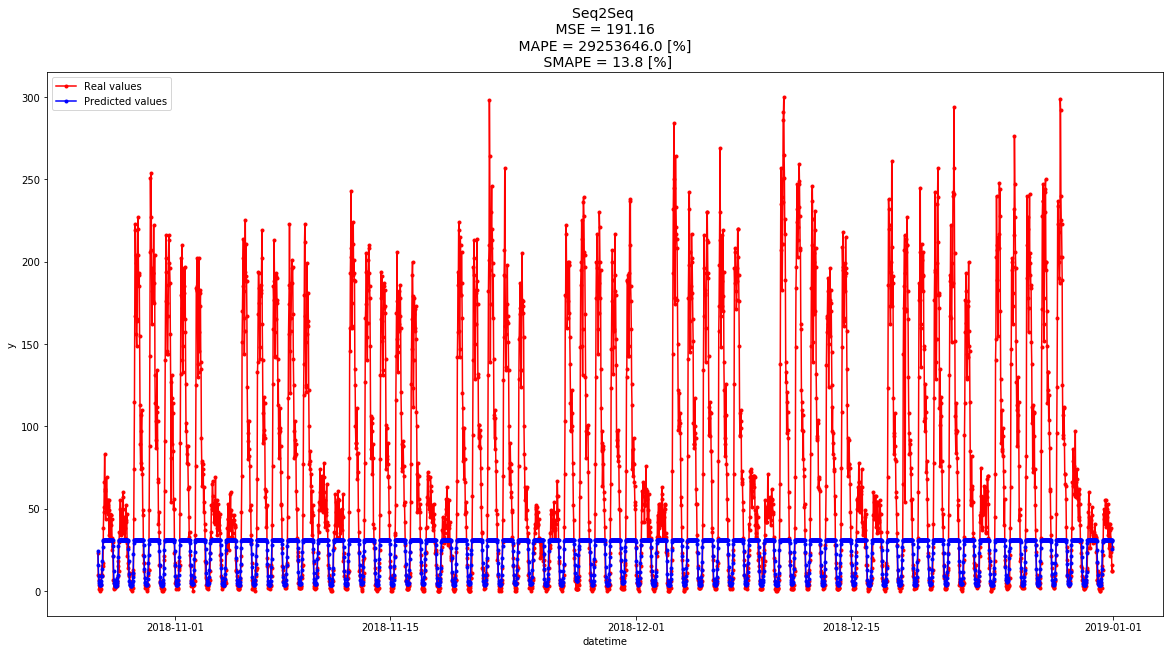

In [119]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(x.index, y_true, '.-', color='red', label='Real values')
plt.plot(x.index, y_preds, '.-', color='blue', label='Predicted values')

plt.ylabel('y')
plt.xlabel('datetime')
plt.legend()

mse = model.evaluate([encoder_input_test, decoder_input_test], decoder_output_test)[0]
mape = model.evaluate([encoder_input_test, decoder_input_test], decoder_output_test)[1]
smape = model.evaluate([encoder_input_test, decoder_input_test], decoder_output_test)[2]

plt.title('Seq2Seq \n MSE = %.2f \n MAPE = %.1f [%%] \n SMAPE = %.1f [%%]' % (mse, mape, smape), fontsize = 14)

### 以天為單位比對預測結果

In [106]:
split_index = int(data.shape[0]*test_size)
x = data[split_index:]

# 修正預測跟實際值差距的數值
datetime_difference = len(x) - len(y_true)
x = x[datetime_difference:] 

# 比對預測與實際值
datetime = x.index
y_preds = y_preds.reshape(y_preds.shape[0])
y_true = y_true.reshape(y_true.shape[0])
results = pandas.DataFrame(y_true, y_preds) 
result = results.reset_index() 
result.columns = ['y_pred', 'y_true']
result['datetime'] = datetime
result = result.set_index(['datetime'])

# 重新取樣
result = result.resample('D').sum()
# 去除Nan
result = result.dropna()

In [107]:
# 比較預測與實際值

ytrue = result['y_true']
ypred = result['y_pred']
n = len(result)

mse = (1/n)*np.sum((ypred - ytrue)**2)
mape = (100/n) * np.sum(np.abs((ytrue - ypred) / ypred))
smape = (100/n) * np.sum( np.abs((ytrue - ypred)) / (np.abs(ytrue) + np.abs(ypred)) )

Text(0.5, 1.0, 'Seq2Seq By Day \n MSE = 7172066.48 \n MAPE = 202.2 [%] \n SMAPE = 44.3 [%]')

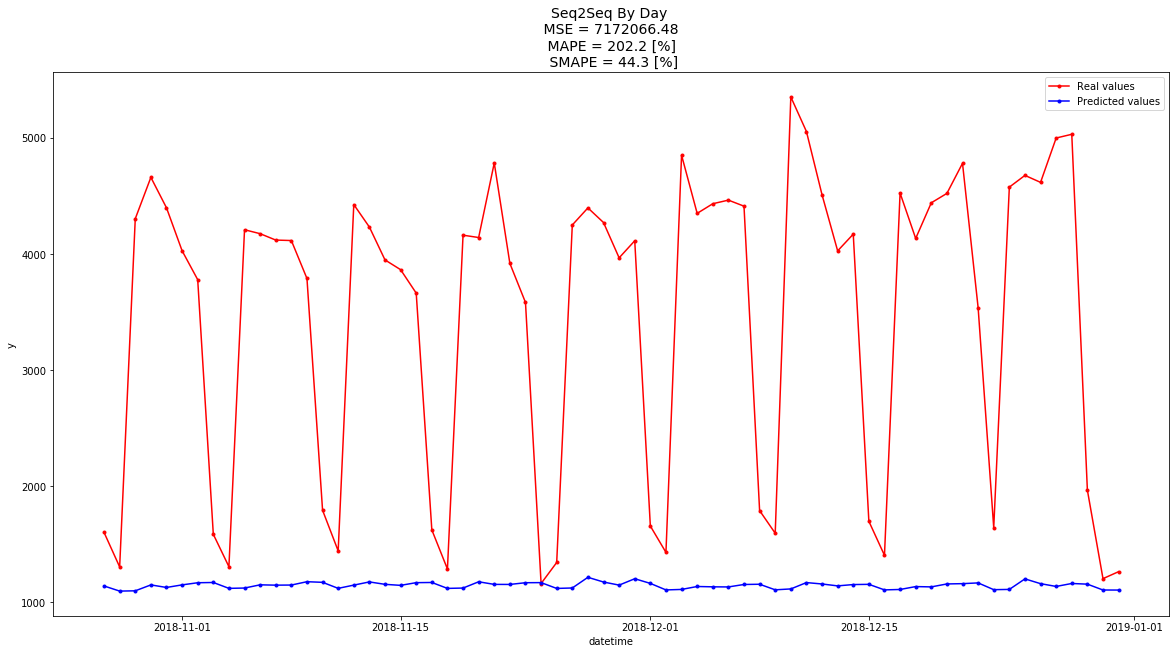

In [108]:
plt.figure(figsize=(20,10))
plt.plot(result.index, result['y_true'], '.-', color='red', label='Real values') 
plt.plot(result.index, result['y_pred'], '.-', color='blue', label='Predicted values')

plt.ylabel('y')
plt.xlabel('datetime')
plt.legend()

plt.title('Seq2Seq By Day \n MSE = %.2f \n MAPE = %.1f [%%] \n SMAPE = %.1f [%%]' % (mse, mape, smape), fontsize = 14)

### 讀取模型

In [121]:
import keras
import keras.backend as K
def mape(y_true, y_pred):
    return (K.abs(y_true - y_pred) / K.abs(y_pred)) * 100

def smape(y_true, y_pred):
    return (K.abs(y_pred - y_true) / ((K.abs(y_true) + K.abs(y_pred))))*100

from keras.utils.generic_utils import get_custom_objects
get_custom_objects().update({"smape": smape})


model = keras.models.load_model('model/seq2seq_30_iters.h5')